In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as cuts


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.gStyle.SetOptStat(0)

In [3]:
run_period = 'spring'

df_pipkmks_data = tools.get_dataframe('pipkmks', run_period, 'data').Filter(cuts.KSTAR_ALL_CUT_PIPKMKS).Define('chi2ndf', 'kin_chisq/kin_ndf')
df_pimkpks_data = tools.get_dataframe('pimkpks', run_period, 'data').Filter(cuts.KSTAR_ALL_CUT_PIMKPKS).Define('chi2ndf', 'kin_chisq/kin_ndf')
df_pipkmks_signal = tools.get_dataframe('pipkmks', run_period, 'signal').Filter(cuts.KSTAR_ALL_CUT_PIPKMKS).Define('chi2ndf', 'kin_chisq/kin_ndf')
df_pimkpks_signal = tools.get_dataframe('pimkpks', run_period, 'signal').Filter(cuts.KSTAR_ALL_CUT_PIMKPKS).Define('chi2ndf', 'kin_chisq/kin_ndf')


In [4]:
hist_data_pipkmks_x2ndf = df_pipkmks_data.Histo1D(('pipkmks_data_chi2ndf', '#pi^{+}K^{-}K_{S}^{0} data #chi^{2}/ndf', 200, 0, 20), 'chi2ndf')
hist_data_pimkpks_x2ndf = df_pimkpks_data.Histo1D(('pimkpks_data_chi2ndf', '#pi^{-}K^{+}K_{S}^{0} data #chi^{2}/ndf', 200, 0, 20), 'chi2ndf')
hist_signal_pipkmks_x2ndf = df_pipkmks_signal.Histo1D(('pipkmks_data_chi2ndf', '#pi^{+}K^{-}K_{S}^{0} signal MC #chi^{2}/ndf', 200, 0, 20), 'chi2ndf')
hist_signal_pimkpks_x2ndf = df_pimkpks_signal.Histo1D(('pimkpks_data_chi2ndf', '#pi^{-}K^{+}K_{S}^{0} signal MC #chi^{2}/ndf', 200, 0, 20), 'chi2ndf')

In [5]:
hist_data_pipkmks_x2ndf.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_data_pimkpks_x2ndf.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_signal_pipkmks_x2ndf.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['purple']))
hist_signal_pimkpks_x2ndf.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['orange']))

In [6]:
hist_data_pipkmks_x2ndf.Scale(1/hist_data_pipkmks_x2ndf.Integral())
hist_data_pimkpks_x2ndf.Scale(1/hist_data_pimkpks_x2ndf.Integral())
hist_signal_pipkmks_x2ndf.Scale(1/hist_signal_pipkmks_x2ndf.Integral())
hist_signal_pimkpks_x2ndf.Scale(1/hist_signal_pimkpks_x2ndf.Integral())

In [7]:
legend = ROOT.TLegend(0.2, 0.5, 0.5, 0.8)
legend.AddEntry(hist_data_pipkmks_x2ndf.GetPtr(), '#pi^{+}K^{-}K_{S}^{0} data', 'l')
legend.AddEntry(hist_data_pimkpks_x2ndf.GetPtr(), '#pi^{-}K^{+}K_{S}^{0} data', 'l')
legend.AddEntry(hist_signal_pipkmks_x2ndf.GetPtr(), '#pi^{+}K^{-}K_{S}^{0} signal MC', 'l')
legend.AddEntry(hist_signal_pimkpks_x2ndf.GetPtr(), '#pi^{-}K^{+}K_{S}^{0} signal MC', 'l')

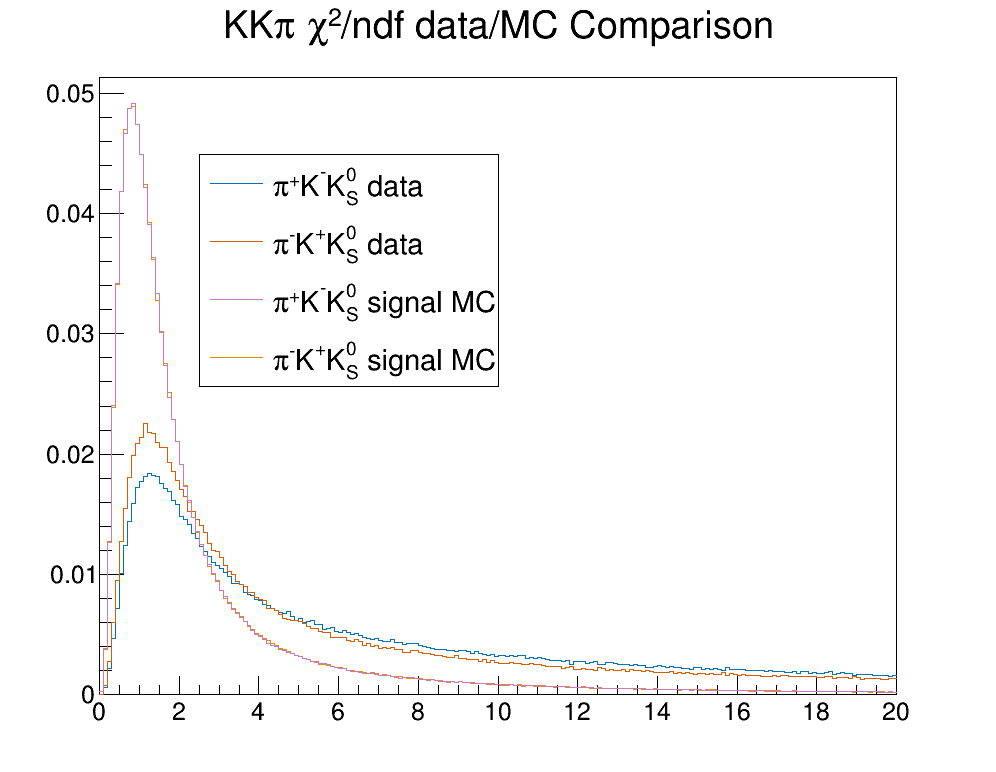

In [8]:
hist_signal_pimkpks_x2ndf.SetTitle('KK#pi #chi^{2}/ndf data/MC Comparison')
c = ROOT.TCanvas('c', 'c', 1000, 800)
hist_signal_pimkpks_x2ndf.Draw('hist')
hist_data_pipkmks_x2ndf.Draw('same hist')
hist_data_pimkpks_x2ndf.Draw('same hist')
hist_signal_pipkmks_x2ndf.Draw('same hist')
legend.Draw()
c.Draw()